<a href="https://colab.research.google.com/github/kstone16/Notebook-3-StoneK/blob/main/Copy_of_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #3: Cross Validation with kNN and Wine Ratings
**Name: your name here**


Prepare the data

In [2]:
import pandas
import numpy
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/winequality-white.csv')

# Exercise #1. 
Implement mean squared error (mse) algorithm

In [4]:
def mse(actual,predicted):
    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of value
    #   (we assume that number of elements in actual and predicted match)
    # OUTPUT: 
    #   the mean squared error between the actual and predicted values
    sqsum = 0
    for i in range(len(actual)):
      new = (actual[i] - predicted[i])**2
      sqsum = sqsum + new
    mse = sqsum/(len(actual))
    print(mse)

In [5]:
NBA = [0,1,0,1,0,1,0,1]
NFL = [0.5,.5,.5,.5,.5,.5,.5,.5]
mse(NBA, NFL)

0.25


# Exercise #2
Implement the testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. 

In [6]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/winequality-white.csv')

# establish test_data and train_data here
test_data = wine_data.iloc[0:320]
train_data= wine_data.iloc[320:]

# Exercise #3
Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and **graphically show** the results using your implementation of **mse**.

In [7]:
import numpy

def regression_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['fixed acidity']-data['fixed acidity'])**2
    +(specimen['volatile acidity']-data['volatile acidity'])**2
    +(specimen['citric acid']-data['citric acid'])**2
    +(specimen['residual sugar']-data['residual sugar'])**2
    +(specimen['chlorides']-data['chlorides'])**2
    +(specimen['free sulfur dioxide']-data['free sulfur dioxide'])**2
    +(specimen['total sulfur dioxide']-data['total sulfur dioxide'])**2
    +(specimen['density']-data['density'])**2
    +(specimen['pH']-data['pH'])**2
    +(specimen['sulphates']-data['sulphates'])**2
    +(specimen['alcohol']-data['alcohol'])**2
    )
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['quality'].mean()

In [8]:
def regressions_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    results = []
    for i in range(len(test_data)):
      prediction = regression_kNN(test_data.iloc[i], train_data,k)
      results.append(prediction)
    return pandas.Series(results)

In [9]:
# normalize the data (part 1) -- calculate the mean and standard deviation values for the predictor columns
fixed_acidity_mean = train_data['fixed acidity'].mean()
fixed_acidity_std = train_data['fixed acidity'].std()
volatile_acidity_mean = train_data['volatile acidity'].mean()
volatile_acidity_std = train_data['volatile acidity'].std()
citric_acid_mean = train_data['citric acid'].mean()
citric_acid_std = train_data['citric acid'].std()
residual_sugar_mean = train_data['residual sugar'].mean()
residual_sugar_std = train_data['residual sugar'].std()
chlorides_mean = train_data['chlorides'].mean()
chlorides_std = train_data['chlorides'].std()
free_sulfur_dioxide_mean = train_data['free sulfur dioxide'].mean()
free_sulfur_dioxide_std = train_data['free sulfur dioxide'].std()
total_sulfur_dioxide_mean = train_data['total sulfur dioxide'].mean()
total_sulfur_dioxide_std = train_data['total sulfur dioxide'].std()
density_mean = train_data['density'].mean()
density_std = train_data['density'].std()
pH_mean = train_data['pH'].mean()
pH_std = train_data['pH'].std()
sulphates_mean = train_data['sulphates'].mean()
sulphates_std = train_data['sulphates'].std()
alcohol_mean = train_data['alcohol'].mean()
alcohol_std = train_data['alcohol'].std()


In [10]:
 # normalize the data (part 1) -- normalize both the training and testing data frames
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['fixed acidity'] = (train_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
train_norm_data['volatile acidity'] = (train_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
train_norm_data['citric acid'] = (train_data['citric acid'] - citric_acid_mean)/citric_acid_std
train_norm_data['residual sugar'] = (train_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
train_norm_data['chlorides'] = (train_data['chlorides'] - chlorides_mean)/chlorides_std
train_norm_data['free sulfur dioxide'] = (train_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
train_norm_data['total sulfur dioxide'] = (train_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
train_norm_data['density'] = (train_data['density'] - density_mean)/density_std
train_norm_data['pH'] = (train_data['pH'] - pH_mean)/pH_std
train_norm_data['sulphates'] = (train_data['sulphates'] - sulphates_mean)/sulphates_std
train_norm_data['alcohol'] = (train_data['alcohol'] - alcohol_mean)/alcohol_std

# update the columns in test_norm_data 
test_norm_data['fixed acidity'] = (test_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
test_norm_data['volatile acidity'] = (test_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
test_norm_data['citric acid'] = (test_data['citric acid'] - citric_acid_mean)/citric_acid_std
test_norm_data['residual sugar'] = (test_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
test_norm_data['chlorides'] = (test_data['chlorides'] - chlorides_mean)/chlorides_std
test_norm_data['free sulfur dioxide'] = (test_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
test_norm_data['total sulfur dioxide'] = (test_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
test_norm_data['density'] = (test_data['density'] - density_mean)/density_std
test_norm_data['pH'] = (test_data['pH'] - pH_mean)/pH_std
test_norm_data['sulphates'] = (test_data['sulphates'] - sulphates_mean)/sulphates_std
test_norm_data['alcohol'] = (test_data['alcohol'] - alcohol_mean)/alcohol_std

In [ ]:
#I've split the data
#I've created my learning model: kNN/all kNN
#I must train my model on my train_norm_data
#I must predict values for the test data - based on k
#I must use a metric (mse) to compare predicted testsolutions and actual test solutions - one mse for each value of k


In [11]:
regressions_all_kNN(test_norm_data, train_norm_data, 10)

0      5.4
1      5.1
2      5.5
3      5.6
4      5.4
      ... 
315    5.8
316    5.6
317    5.3
318    6.0
319    5.3
Length: 320, dtype: float64

In [12]:
test_norm_data.quality

0      5
1      5
2      5
3      6
4      5
      ..
315    6
316    5
317    6
318    7
319    6
Name: quality, Length: 320, dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#x values for graph
xvals = range(1,10)
#creating the series that will from out line in the graph
series = []
#creating a for loop that will run up through the value of k I want
for i in range(1,10):
  #This is my list of the kNN function's predictions of 'quality' for the test data
  a_prediction = regressions_all_kNN(test_norm_data, train_norm_data, i)
  #This takes the prediction and uses the actual values of 'quality' from the test data to determine a singluar mse value.
  val = mse(test_norm_data.quality,a_prediction)
  #Then, I add that mse value to my series
  series.append(val)
  #then run again for the next value of k

print(series)
#I don't know what the 9 decimals are. And when I print series, it shows there is nothing there.



0.684375
0.56015625
0.4975694444444453
0.4783203125
0.48987500000000017
0.49227430555555574
0.47621173469387673
0.457421875
0.43993055555555516
[None, None, None, None, None, None, None, None, None]


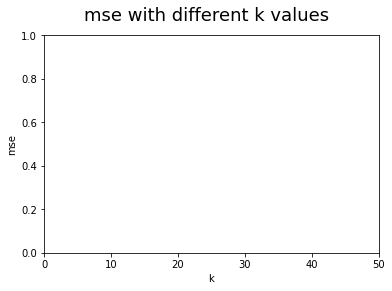

In [14]:
#add titles to axis and graph
plt.suptitle('mse with different k values', fontsize=18)
plt.xlabel('k')
plt.ylabel('mse')

#plot the data
plt.plot(xvals, series, 'r,-', label='mse')
plt.axis([0,50,0,1]) #[x_min, x_max, y_min, y_max]
plt.show()

# Exercise #4
Repeat the experiment and **graphically show the results** using r^2.

# Exercise #5. 
Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? **Explain why.** Use a markdown cell to explain your conclusions.